In [2]:
import json
import tensorflow as tf
datastore = []
with open("Sarcasm_Headlines_Dataset.json", 'r') as f:
    for line in f:
        try:
            datastore.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")


In [3]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [4]:
sentences = []
labels = []
urls=[]
training_size = 20000
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
tokenizer=Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index=tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)
#26k sequences with 40 tokens

[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [7]:
# now we need training n testing set we can make it using python
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [8]:
# after splitting we want tokens only on training data and not on testing data so for that we will do this implementation
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [9]:
# now the concept of embeddings come in
#neural network code
model= tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

D:\python_place\Python311\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [10]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
#now lets train
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - 4ms/step - accuracy: 0.5634 - loss: 0.6812 - val_accuracy: 0.6433 - val_loss: 0.6600
Epoch 2/30
625/625 - 2s - 2ms/step - accuracy: 0.7261 - loss: 0.5521 - val_accuracy: 0.7870 - val_loss: 0.4696
Epoch 3/30
625/625 - 1s - 2ms/step - accuracy: 0.8159 - loss: 0.4151 - val_accuracy: 0.8267 - val_loss: 0.4045
Epoch 4/30
625/625 - 2s - 2ms/step - accuracy: 0.8450 - loss: 0.3587 - val_accuracy: 0.8420 - val_loss: 0.3771
Epoch 5/30
625/625 - 1s - 2ms/step - accuracy: 0.8709 - loss: 0.3147 - val_accuracy: 0.8447 - val_loss: 0.3634
Epoch 6/30
625/625 - 2s - 3ms/step - accuracy: 0.8804 - loss: 0.2893 - val_accuracy: 0.8526 - val_loss: 0.3503
Epoch 7/30
625/625 - 2s - 2ms/step - accuracy: 0.8853 - loss: 0.2706 - val_accuracy: 0.8261 - val_loss: 0.3866
Epoch 8/30
625/625 - 2s - 3ms/step - accuracy: 0.8992 - loss: 0.2497 - val_accuracy: 0.8535 - val_loss: 0.3488
Epoch 9/30
625/625 - 1s - 2ms/step - accuracy: 0.9066 - loss: 0.2321 - val_accuracy: 0.8529 - val_loss: 0.3476
E

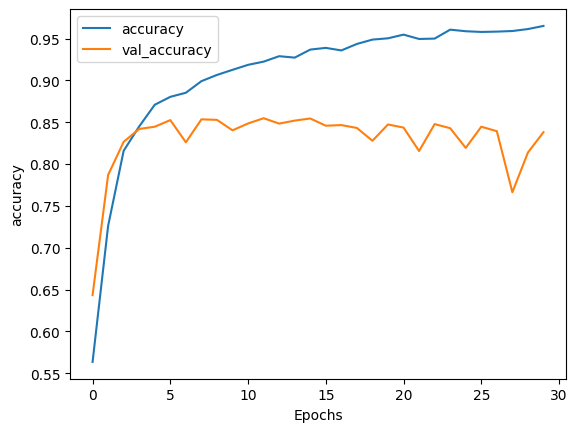

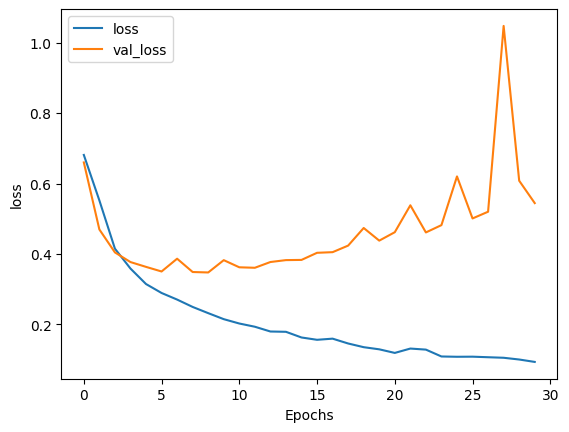

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [16]:
sentence = ["granny starting to fear spiders in the garden might be real", "i am busy right now, can i ignore you some other time"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.87992275]
 [0.3493422 ]]


In [14]:
 #on the next class i will explai how to generate text
